# Tasks for laboratory assignment 1

In [1]:
# imports section

import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
from datetime import datetime
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict 

## Extract webpage data given the url

Create a Python script that performs basic web scraping on a page to extract all the information into text and returns it as a string.
String should not contain tags.

In [2]:
def parse_web_page(url):
    try:
        response = requests.get(url)
        response.raise_for_status() 

        soup = BeautifulSoup(response.content, 'html.parser')

        text = soup.get_text(separator=' ', strip=True)

        return text
    except requests.exceptions.HTTPError as error:
        return f"HTTP error occurred: {error}"

print(parse_web_page('https://fmi.chnu.edu.ua/')[:255])
print(parse_web_page('https://en.wikipedia.org/wiki/Web_scraping')[:255])

Головна - Факультет математики та інформатики Перейти до основного вмісту [email protected] 58012, Україна, м. Чернівці, вул. Університетська, 28 Новини Всі Загальні Оголошення Події Студенту Викладачу Вітання Діяльність Наукова Навчально-методична Міжнар
Web scraping - Wikipedia Jump to content Main menu Main menu move to sidebar hide Navigation Main page Contents Current events Random article About Wikipedia Contact us Donate Contribute Help Learn to edit Community portal Recent changes Upload file Searc


## Get data from the API

Create a python script that performs basic request to API endpoint and saves that data to a JSON file `result.json`.

In [10]:
def parse_api(api_url):
    try:
        response = requests.get(api_url)
        response.raise_for_status() 
        data = response.json()

        with open('result.json', 'w') as file_js:
            json.dump(data, file_js, indent=4)

        print(f"Data successfully saved to result.json")
    except requests.exceptions.HTTPError as error:
        print(f"HTTP error occurred: {error}")

parse_api('https://api.github.com/')

Data successfully saved to result.json


## Parse the json file

Parse the `weather.json` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [9]:
def parse_json(date):
    try:
        with open('resources/weather.json', 'r') as file_js:
            weatherData = json.load(file_js)
        
        weather = weatherData.get("daily", [])
        result = [entry for entry in weather if entry.get('date') == date]
        
        return result
    except FileNotFoundError:
        print("The weather.json file was not found.")
    
target_date = '2024-08-19'
print(parse_json(target_date))

[{'date': '2024-08-19', 'max_temperature': 30.0, 'min_temperature': 21.0, 'precipitation': 5.0, 'wind_speed': 10.0, 'humidity': 70, 'weather_description': 'Light rain'}]


## Parse the csv file

Parse the `weather.csv` file and return weather data for a specific date, that is given as a parameter. Return the data as an array.

In [8]:
def parse_csv(date):
    try:
        with open('resources/weather.csv', 'r') as file_csv:
            reader = csv.DictReader(file_csv)
            
            for row in reader:
                if row['CET'] == date:
                    return list(row.values())
        return []
    except FileNotFoundError:
        print("The weather.csv file was not found.")

    
target_date = '1997-5-22'
print(parse_csv(target_date))

['1997-5-22', '25', '18', '10', '11', '8', '6', '88', '54', '34', '1017', '1015', '1012', '10', '10', '10', '11', '3', '', '0.00', '3', '', '277']


## Visualize data

Visualize the `weather.csv` data using matplotlib. Choose your own approach to data visualization. Save the results (as `.png`, `.webp` files etc., your choise) in this repository. 

CSV Header: ['CET', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC', 'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity', 'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa', 'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa', 'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM', 'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h', 'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees']


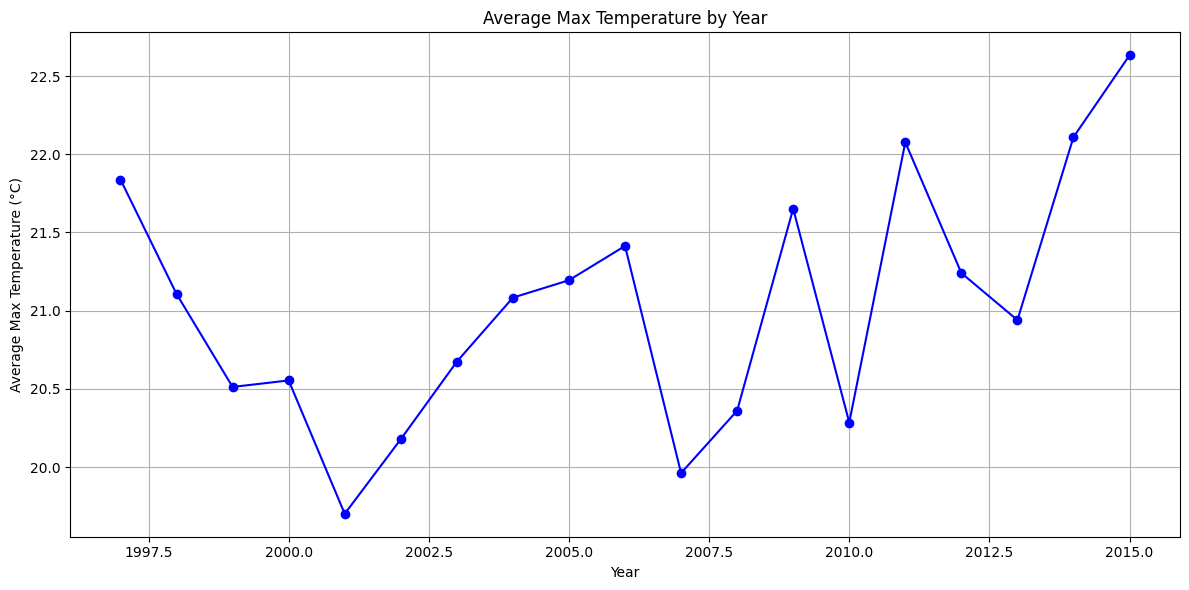

Plot saved as 'avg_temp_by_year.png'


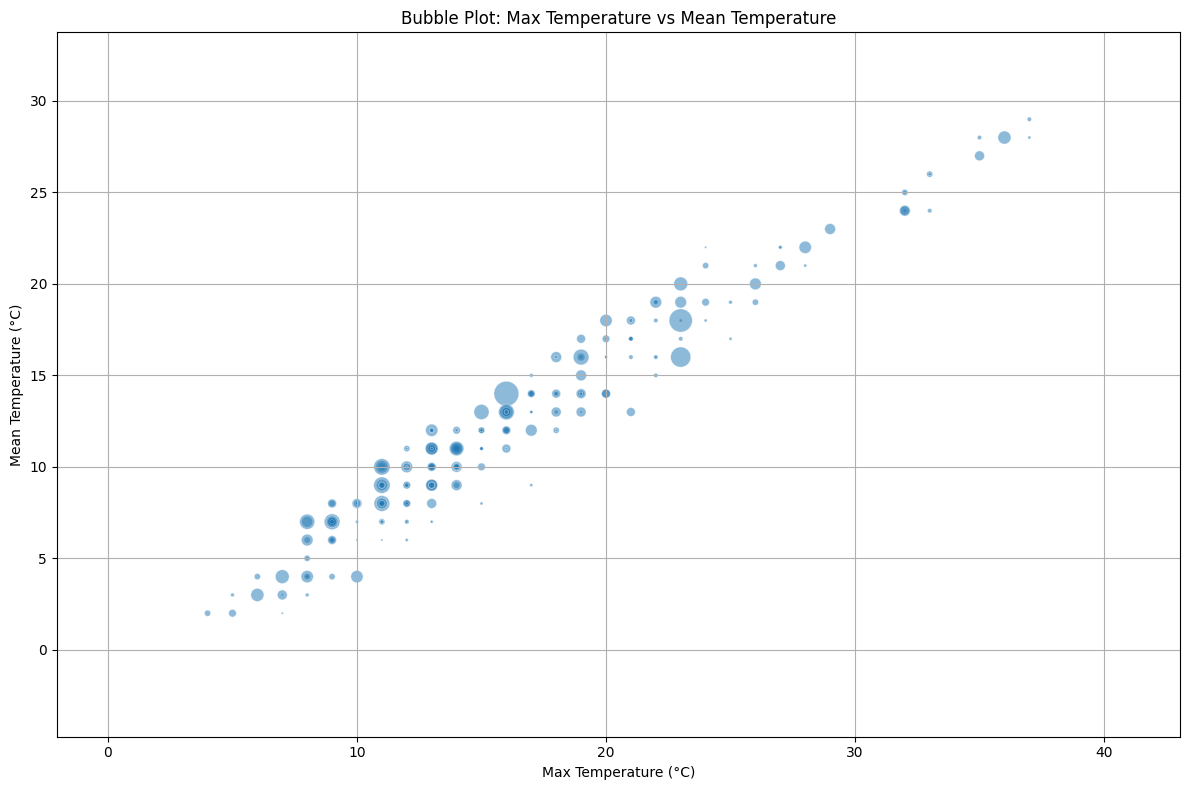

Bubble plot saved as 'bubble_plot.png' and 'bubble_plot.webp'


In [7]:
def visualize_histograms():
    dates = []
    max_temp = []
    mean_temp = []
    precipitation = []

    try:
        with open('resources/weather.csv', 'r') as file_csv:
            reader = csv.DictReader(file_csv)
            header = reader.fieldnames

            header = [column.strip() for column in header]
            print("CSV Header:", header)

            for row in reader:
                dates.append(datetime.strptime(row['CET'].strip(), '%Y-%m-%d'))
                max_temp.append(float(row['Max TemperatureC'].strip() or 0))
                mean_temp.append(float(row['Mean TemperatureC'].strip() or 0))
                precipitation.append(float(row['Precipitationmm'].strip() or 0)*10)
                
        yearly_temps = defaultdict(list)
        for date, temp in zip(dates, max_temp):
            year = date.year
            yearly_temps[year].append(temp)

        years = sorted(yearly_temps.keys())
        avg_temps = [sum(yearly_temps[year]) / len(yearly_temps[year]) for year in years]

        plt.figure(figsize=(12, 6))
        plt.plot(years, avg_temps, marker='o', color='blue')
        plt.title('Average Max Temperature by Year')
        plt.xlabel('Year')
        plt.ylabel('Average Max Temperature (°C)')
        plt.grid(True)

        plt.tight_layout()
        plt.savefig('avg_temp_by_year.png')
        plt.show()

        print("Plot saved as 'avg_temp_by_year.png'")

        plt.figure(figsize=(12, 8))
        plt.scatter(max_temp, mean_temp, s=precipitation, alpha=0.5, edgecolors='w', linewidth=0.5)
        plt.title('Bubble Plot: Max Temperature vs Mean Temperature')
        plt.xlabel('Max Temperature (°C)')
        plt.ylabel('Mean Temperature (°C)')
        plt.grid(True)

        plt.tight_layout()
        plt.savefig('bubble_plot.png')
        plt.show()

        print("Bubble plot saved as 'bubble_plot.png' and 'bubble_plot.webp'")
    except FileNotFoundError:
        print("The weather.csv file was not found.")

visualize_histograms()
